We can start building a model using the data we've created from the previous session.

In [2]:
import pandas as pd
from sklearn import tree

In [6]:
train_df = pd.read_csv("../data/Titanic/train_processed.csv")

### Prepare the data for training

The first step is to separate the training data (all the features) from the target (survival).

In [7]:
y = train_df['Survived']
x = train_df.drop(['Survived'], axis=1)

In [8]:
x.shape, y.shape

((889, 9), (889,))

Like we have discussed before, we need to split data into train/valid/test datasets. Here we need to split our training data into train/valid so we can evaluate our model performance on the validation dataset. 

You can do it by randomly setting aside 20% of data. Scikit-learn also provides a handy function for doing that.

In [10]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=88, stratify=y)

### Training process

In [12]:
??tree.DecisionTreeClassifier

Init signature:
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Source:        
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose th

Let's start by build a shallow tree

In [107]:
model_0 = tree.DecisionTreeClassifier(max_depth = 2)


In [108]:
model_0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [109]:
y_pred = model_0.predict(X_valid)

In [110]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0])

In [111]:
y_train

452    1
869    1
641    0
764    1
695    0
      ..
43     1
199    0
95     0
887    1
343    0
Name: Survived, Length: 711, dtype: int64

In [112]:
train_pred = model_0.predict(X_train)

In [113]:
scores = pd.DataFrame({'pred': y_pred, 'label': y_valid})

### Visualizing the tree

In [114]:
r = tree.export_text(model_0, feature_names=list(x.columns))

In [115]:
print(r)

|--- Sex_numeric <= 0.50
|   |--- Fare <= 26.27
|   |   |--- class: 0
|   |--- Fare >  26.27
|   |   |--- class: 0
|--- Sex_numeric >  0.50
|   |--- Pclass <= 2.50
|   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- class: 0



[Text(0.5, 0.8333333333333334, 'Sex_numeric <= 0.5\ngini = 0.472\nsamples = 711\nvalue = [439, 272]'),
 Text(0.25, 0.5, 'Fare <= 26.269\ngini = 0.307\nsamples = 454\nvalue = [368, 86]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.223\nsamples = 329\nvalue = [287, 42]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.456\nsamples = 125\nvalue = [81, 44]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.4\nsamples = 257\nvalue = [71, 186]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.111\nsamples = 136\nvalue = [8, 128]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.499\nsamples = 121\nvalue = [63, 58]')]

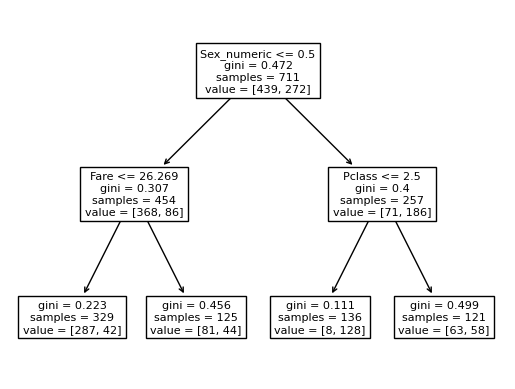

In [116]:
tree.plot_tree(model_0, feature_names=list(x.columns))

### Evaluting the model performance

In [117]:
import numpy as np

In [118]:
scores['TP'] = np.where((scores['pred'] == 1) & (scores['label'] == 1), 1, 0)

In [119]:
scores['TN'] = np.where((scores['pred'] == 0) & (scores['label'] == 0), 1, 0)

In [120]:
scores['FP'] = np.where((scores['pred'] == 1) & (scores['label'] == 0), 1, 0)

In [121]:
scores['FN'] = np.where((scores['pred'] == 0) & (scores['label'] == 1), 1, 0)

In [122]:
# recall
scores['TP'].sum() / (scores['TP'].sum() + scores['FN'].sum())

0.45588235294117646

In [123]:
# precision
scores['TP'].sum() / (scores['TP'].sum() + scores['FP'].sum())

0.96875

In [124]:
# accuracy
(scores['TP'].sum() + scores['TN'].sum()) / len(scores)

0.7865168539325843

Scikit-learn also has built-in functions that we can use

In [125]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [126]:
acc = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 78.65%


In [127]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
print(f"precision, recall and f1 score on training dataset is {precision_train}, {recall_train}, {f1_train}")
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(f"precision, recall and f1 score on validation dataset is {precision}, {recall}, {f1}")

precision, recall and f1 score on training dataset is 0.9411764705882353, 0.47058823529411764, 0.627450980392157
precision, recall and f1 score on validation dataset is 0.96875, 0.45588235294117646, 0.62


### Try other hyperparameters

First let's make the tree more complex by adding one more level

In [170]:
model_1 = tree.DecisionTreeClassifier(max_depth=4)

In [171]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [172]:
y_pred = model_1.predict(X_valid)
train_pred = model_1.predict(X_train)

In [173]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
print(f"precision, recall and f1 score on training dataset is {precision_train}, {recall_train}, {f1_train}")
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(f"precision, recall and f1 score on validation dataset is {precision}, {recall}, {f1}")

precision, recall and f1 score on training dataset is 0.8894736842105263, 0.6213235294117647, 0.7316017316017316
precision, recall and f1 score on validation dataset is 0.9130434782608695, 0.6176470588235294, 0.7368421052631579


Then let's make the tree even more complex

In [174]:
model_2 = tree.DecisionTreeClassifier(max_depth=8)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_valid)
train_pred = model_2.predict(X_train)
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
print(f"precision, recall and f1 score on training dataset is {precision_train}, {recall_train}, {f1_train}")
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(f"precision, recall and f1 score on validation dataset is {precision}, {recall}, {f1}")


precision, recall and f1 score on training dataset is 0.9478260869565217, 0.8014705882352942, 0.8685258964143425
precision, recall and f1 score on validation dataset is 0.8775510204081632, 0.6323529411764706, 0.7350427350427351


### Grid search to find the best hyperparameters

In [165]:
from sklearn.model_selection import GridSearchCV

In [175]:
param_grid = {'max_depth': [2, 4, 8], 'min_samples_split': [2, 4]}

model = tree.DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(x, y)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 4, 'min_samples_split': 2}


In [176]:
best_model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(precision, recall, f1)

0.9130434782608695 0.6176470588235294 0.7368421052631579
